In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 41.5MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import re
import torch
import torchvision
from PIL import Image
import time
import albumentations as A
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SequentialSampler
from matplotlib import pyplot as plt

In [ ]:
DIR_INPUT = '/content/drive/MyDrive/Colab_Notebooks/Ptyxiaki/LeafsDetectionRaw'
DIR_TEST = f'{DIR_INPUT}/test'
# Loading the device now
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
# HELPER FUNCTIONS FOR VIZUALISING / PREDICTING

def get_boxes(tensor,index,score=0.5):

    if index >= len(tensor)  or index<0:
        return 0
    
    temp_boxes = []
    for i in range(len(tensor[index]['boxes'])):
        if tensor[index]['scores'][i] > score:
            temp_boxes.append(tensor[index]['boxes'][i].cpu().detach().numpy().astype(np.int32))    
        
    return temp_boxes    




def load_test_dataset():
    data_path = DIR_TEST
    test_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        
        transform=torchvision.transforms.Compose([
            torchvision.transforms.Grayscale(num_output_channels=1),
            torchvision.transforms.ToTensor(),]
    ))
    
    test_loader = torch.utils.data.DataLoader(    
        test_dataset,
        batch_size=1,
        num_workers=1,
        shuffle=False
    )
    return test_loader

def get_test_image(itr,score = 0.7):
    image, targets= next(itr)
    sample = image
    
    image = image.to(device)


    model.eval()
    outputs = model(image)
    
    outputs = [{k: v.to(device) for k, v in t.items()} for t in outputs]   
    
    boxes = get_boxes(outputs,0,score)
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    print(sample.shape)
    img = sample[0].permute(1,2,0).cpu().numpy()
    print(img.shape)
    
    # resize image
    width = 1024
    height = 1024
    dim = (width, height)
    img = cv2.resize(np.float32(img), dim, interpolation = cv2.INTER_AREA)
    # respahe image
    img = np.array(img)
    img = np.reshape(img,(img.shape[1],img.shape[1]))
    print(img.shape)


    for box in boxes:
        x,y,w,h = box
        
        cv2.rectangle(np.float32(img),
                      (int(box[0]), int(box[1])),
                      (int(box[2]), int(box[3])),
                      0, 2)
    ax.set_axis_off()
    ax.imshow(img,cmap='gray')

**Loading ResNet50 trained on COCO**

In [ ]:
model = torch.load("/content/drive/MyDrive/Colab_Notebooks/Ptyxiaki/leaves_fasterrcnn_model.pth", map_location={'cuda:0': 'cpu'})
model.to(device)
print("Model loaded")

Model loaded


**Validation (On data from Training)**

In [ ]:
image_list = os.listdir(DIR_TEST+"/leaf")
print(image_list)


['resize-1608813444383050788sickleaf.jpg', 'resize-1608813672258069701healthy.jpg', '131981530_419196109264659_8877108728106036211_n.jpg']


In [ ]:
it = iter(load_test_dataset())

torch.Size([1, 1, 2048, 1536])
(2048, 1536, 1)
(1024, 1024)
(1024, 1024)
9.400244235992432


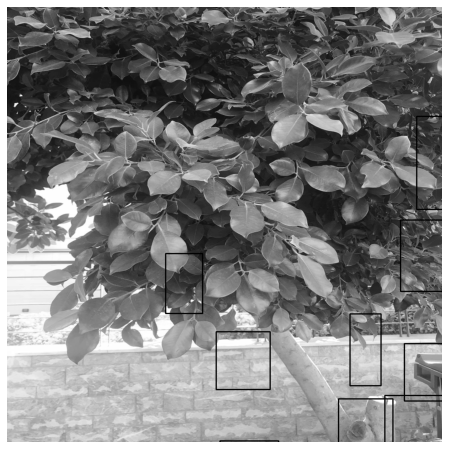

In [ ]:
start = time.time()
get_test_image(it,0.7)
print(time.time()-start)

torch.Size([1, 1, 1024, 1024])
(1024, 1024, 1)
(1024, 1024)
(1024, 1024)
6.220142126083374


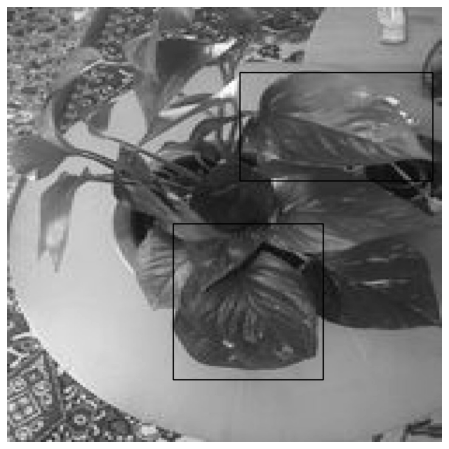

In [ ]:
start = time.time()
get_test_image(it,0.8)
print(time.time()-start)

torch.Size([1, 1, 1024, 1024])
(1024, 1024, 1)
(1024, 1024)
(1024, 1024)
6.338828086853027


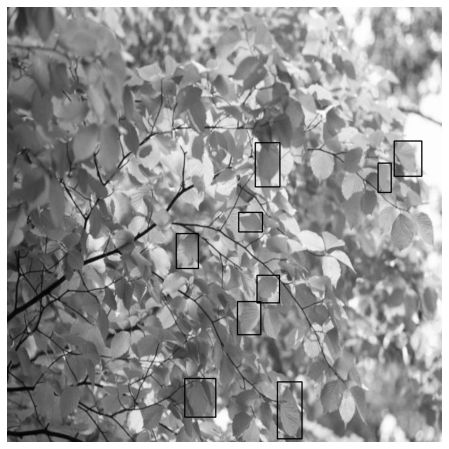

In [ ]:
start = time.time()
get_test_image(it,0.8)
print(time.time()-start)